Please Follow this Docker container installation process in your MacBook/Laptop before running this Python+R Notebook below.

  - Installation setup of environment where this notebook runs can be found i 
  Container with Jupyter+H2o.ai+Python3+R+Spark in this [link_here](https://github.com/jpacerqueira/project_lost_saturn)
  
  Also :
  - You need a Strong bandwith the install the Container environment it takes about 10-11 minutes to finish.
  
  - Good Luck,  stay safe! But investigate Corona virus(covid-19 or SARS-Cov-2) in your area and give the information back to the comunity!

  - Folium maps have custom Javascript and won't display in GitHub : https://stackoverflow.com/questions/53240378/folium-map-fail-to-render-in-notebook-on-github

# SparkSQL   -  Daily Analysis   -  Covid19 Sars-Cov2


###  COVID-19 SARS-COV2 - Daily Analysis


### Executed with data from John Hopkins inst. gituhub + my daily analysis notebooks


## Scrool to the bottom and look at the latest grafics

### 1.

###  Loading csv Daily Analysis file

In [1]:
#################################################################
###### Load The Daily JohnHopkins + 1Day Notebook Analysis ######
#################################################################
### Input date for analysis
from datetime import datetime
#
#anltdate="2021-XX-XX"
anltdate=datetime.today().strftime('%Y-%m-%d')
vanltdate="'''"+anltdate+"'''"
print(vanltdate)
configs = {"analytics_date":vanltdate}
#
### Input delta in folder :  /data
my_input_csv_table="World_v2--Confirmed-1Day_Forecast_--_train_"+anltdate+"-copy0.csv"
delta_location_covid19="file:///home/notebookuser/notebooks/data/delta_daily-covid19-global-analysis/dt="+anltdate
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
#
sc = pyspark.SparkContext(appName="Daily-Covid19-Global-Analysis")
sqlContext = SQLContext(sc)
#
#
internal_csv_files="file:///home/notebookuser/notebooks/covid19/data/"+my_input_csv_table
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
### Scructure
from pyspark.sql.types import StructField,IntegerType,StructType,StringType,FloatType,DoubleType
newDF=[StructField('date',StringType(),True),
       StructField('region',StringType(),True),
       StructField('confirmed',StringType(),True),
       StructField('1_day_change',FloatType(),True),
       StructField('3_day_change',FloatType(),True),
       StructField('7_day_change',FloatType(),True),
       StructField('1_day_change_rate',DoubleType(),True),
       StructField('3_day_change_rate',DoubleType(),True),
       StructField('7_day_change_rate',DoubleType(),True),
       StructField('confirmed_yesterday',FloatType(),True),
       StructField('confirmed_prediction',FloatType(),True),
       StructField('population',FloatType(),True),
       StructField('infected_rate',DoubleType(),True),
       StructField('min',FloatType(),True),
       StructField('max',FloatType(),True),
       StructField('population_percentage_infected_rate_confirmed',DoubleType(),True),
       StructField('population_percentage_factor_9a10_infected_rate_confirmed',DoubleType(),True),
       StructField('delta_new_cases',FloatType(),True),
       StructField('delta_new_cases_per_1M_hab',FloatType(),True),
       StructField('delta_roling_7day_AVG',FloatType(),True),
       StructField('delta_aprox_14day_case_notification_rate_per_100k_hab',FloatType(),True)
       ]
finalStruct=StructType(fields=newDF)
#
dataframe_df1=sqlContext.read.csv(internal_csv_files,header="true",schema=finalStruct)\
.fillna("",subset=['date', 'region'])\
.fillna(0, subset=['1_day_change', '3_day_change', '7_day_change', 'confirmed_yesterday', 'confirmed_prediction', 'population', 'infected_rate', 'min', 'max', 'population_percentage_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'population_percentage_factor_9a10_infected_rate_confirmed', 'delta_new_cases', 'delta_new_cases_per_1M_hab', 'delta_roling_7day_AVG', 'delta_aprox_14day_case_notification_rate_per_100k_hab'])\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#   
columns_to_drop = ['1_day_change_rate', '3_day_change_rate', '7_day_change_rate', 'infected_rate', 'min', 'max']
#
#dataframe_df1.printSchema()
dataframe_df1.drop(*columns_to_drop).show(5)
df2=dataframe_df1.drop(*columns_to_drop)
df2.write.mode('overwrite').format("delta").save(delta_location_covid19)
###
####
## sc.stop()
#
print("Data Load Done!")
#

'''2021-01-13'''
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+---------------------+-----------------------------------------------------+
|      date|         region|confirmed|1_day_change|3_day_change|7_day_change|confirmed_yesterday|confirmed_prediction|population|population_percentage_infected_rate_confirmed|population_percentage_factor_9a10_infected_rate_confirmed|delta_new_cases|delta_new_cases_per_1M_hab|delta_roling_7day_AVG|delta_aprox_14day_case_notification_rate_per_100k_hab|
+----------+---------------+---------+------------+------------+------------+-------------------+--------------------+----------+---------------------------------------------+---------------------------------------------------------+---------------+--------------------------+-

### 2.


### Loading Data to Delta Lake for SparkSQL interrogations

In [2]:
##############################
###### Load The Delta   ######
##############################
###
### Input dates
from datetime import datetime
#
anltdate=datetime.today().strftime('%Y-%m-%d')
vanltdate="'''"+anltdate+"'''"
print(vanltdate)
configs = {"analytics_date":vanltdate}
#
#
### Input delta in folder :  /data
my_input_delta_table="delta_daily-covid19-global-analysis"
#
delta_table_name="covid19_jh_analysis"
###
######
##############################Execution##########################
import findspark
findspark.init()
#
import pyspark
from pyspark.sql import functions as pfunc
from pyspark.sql import SQLContext
from pyspark.sql import Window, types
import re
import pandas as pd
import numpy as np
from pandas import DataFrame
from pyspark.sql.types import IntegerType
from pyspark.sql.types import FloatType
from pyspark.sql.functions import udf
from pyspark.sql.functions import *
from scipy.stats import kstest
from scipy import stats
#
import subprocess
3#
### CONTEXT required for 2nd,3rd,4th,5th runs
#
#sc = pyspark.SparkContext(appName="Daily-Covid19-Delta-Analysis")
#sqlContext = SQLContext(sc)
#
internal_delta_files="file:///home/notebookuser/notebooks/data/"+my_input_delta_table+"/dt="+anltdate
#
# Join with Internal Curation Data in urltopredict staged folder
from pyspark.sql import functions as F
delta_dataframe_df1=sqlContext.read.format("delta").load(internal_delta_files)\
.persist(pyspark.StorageLevel.MEMORY_AND_DISK_2)
#
## ,schema=finalStruct)\
## Py4JJavaError: An error occurred while calling o48.load.
## : org.apache.spark.sql.AnalysisException: delta does not allow user-specified schemas.;
##      	at org.apache.spark.sql.execution.datasources.DataSource.resolveRelation(DataSource.scala:325)
#
delta_dataframe_df1.printSchema()
delta_dataframe_df1.registerTempTable(delta_table_name)
#
#
print("Delta table "+delta_table_name+" : registration Done!")
#

'''2021-01-13'''
root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- confirmed: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- confirmed_prediction: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_infected_rate_confirmed: double (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

Delta table covid19_jh_analysis : registration Done!


### 3.

### Registering SQL functions as jupyter line_cell_magic

In [3]:
#
###### https://github.com/LucaCanali/Miscellaneous/blob/master/Pyspark_SQL_Magic_Jupyter/IPython_Pyspark_SQL_Magic.py
#
#
# IPython magic functions to use with Pyspark and Spark SQL
# The following code is intended as examples of shorcuts to simplify the use of SQL in pyspark
# The defined functions are:
#
# %sql <statement>          - return a Spark DataFrame for lazy evaluation of the SQL
# %sql_show <statement>     - run the SQL statement and show max_show_lines (50) lines
# %sql_display <statement>  - run the SQL statement and display the results using a HTML table 
#                           - this is implemented passing via Pandas and displays up to max_show_lines (50)
# %sql_explain <statement>  - display the execution plan of the SQL statement
#
# Use: %<magic> for line magic or %%<magic> for cell magic.
#
# Author: Luca.Canali@cern.ch
# September 2016
#

from IPython.core.magic import register_line_cell_magic

# Configuration parameters
max_show_lines = 80         # Limit on the number of lines to show with %sql_show and %sql_display
detailed_explain = True     # Set to False if you want to see only the physical plan when running explain

#### Joao - Fix - inject - AnalyticsData
##configs = {'analytics_date': << THE_DATE >> } #,"TABLE_NAME":"my_table","SCHEMA":"my_schema"}
### Input date for analysis
from datetime import datetime
anltdate=datetime.today().strftime('%Y-%m-%d')
vanltdate="'''"+anltdate+"'''"
print(vanltdate)
configs = {"analytics_date":vanltdate}
### 

@register_line_cell_magic
def sql(line, cell=None):
    "Return a Spark DataFrame for lazy evaluation of the sql. Use: %sql or %%sql"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs))

@register_line_cell_magic
def sql_show(line, cell=None):
    "Execute sql and show the first max_show_lines lines. Use: %sql_show or %%sql_show"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).show(max_show_lines) 

@register_line_cell_magic
def sql_display(line, cell=None):
    """Execute sql and convert results to Pandas DataFrame for pretty display or further processing.
    Use: %sql_display or %%sql_display"""
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).limit(max_show_lines).toPandas() 

@register_line_cell_magic
def sql_explain(line, cell=None):
    "Display the execution plan of the sql. Use: %sql_explain or %%sql_explain"
    val = cell if cell is not None else line 
    return sqlContext.sql(val.format(**configs)).explain(detailed_explain)
#

#sc.stop()
#exit()
import os 
# printing environment variables
print(os.environ)

'''2021-01-13'''
environ({'CONDA_SHLVL': '1', 'LS_COLORS': 'rs=0:di=01;34:ln=01;36:mh=00:pi=40;33:so=01;35:do=01;35:bd=40;33;01:cd=40;33;01:or=40;31;01:mi=00:su=37;41:sg=30;43:ca=30;41:tw=30;42:ow=34;42:st=37;44:ex=01;32:*.tar=01;31:*.tgz=01;31:*.arc=01;31:*.arj=01;31:*.taz=01;31:*.lha=01;31:*.lz4=01;31:*.lzh=01;31:*.lzma=01;31:*.tlz=01;31:*.txz=01;31:*.tzo=01;31:*.t7z=01;31:*.zip=01;31:*.z=01;31:*.Z=01;31:*.dz=01;31:*.gz=01;31:*.lrz=01;31:*.lz=01;31:*.lzo=01;31:*.xz=01;31:*.zst=01;31:*.tzst=01;31:*.bz2=01;31:*.bz=01;31:*.tbz=01;31:*.tbz2=01;31:*.tz=01;31:*.deb=01;31:*.rpm=01;31:*.jar=01;31:*.war=01;31:*.ear=01;31:*.sar=01;31:*.rar=01;31:*.alz=01;31:*.ace=01;31:*.zoo=01;31:*.cpio=01;31:*.7z=01;31:*.rz=01;31:*.cab=01;31:*.wim=01;31:*.swm=01;31:*.dwm=01;31:*.esd=01;31:*.jpg=01;35:*.jpeg=01;35:*.mjpg=01;35:*.mjpeg=01;35:*.gif=01;35:*.bmp=01;35:*.pbm=01;35:*.pgm=01;35:*.ppm=01;35:*.tga=01;35:*.xbm=01;35:*.xpm=01;35:*.tif=01;35:*.tiff=01;35:*.png=01;35:*.svg=01;35:*.svgz=01;35:*.mng=01;35:*

### 4.


### Validate SPARK-SQL instructions  %%sql_display  %%sql_explain %%sql_show

In [4]:
%%sql_display
select * from covid19_jh_analysis  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2021-01-13  Afghanistan_nan         0          46.0         184.0   
1  2021-01-13      Albania_nan         0         656.0        1594.0   
2  2021-01-13      Algeria_nan         0         272.0         728.0   
3  2021-01-13      Andorra_nan         0          96.0          96.0   
4  2021-01-13       Angola_nan         0          89.0         187.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         479.0              53584.0               53781.0  35530000.0   
1        4344.0              64627.0               65258.0   2878445.0   
2        1768.0             102641.0              102880.0  41320000.0   
3         374.0               8682.0                8730.0     77239.0   
4         587.0              18343.0               18423.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001508   
1                                       0.022452   
2                                       0.002484   
3                                       0.112416   
4                                       0.000558   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.015082                    197.0   
1                                           0.224524                    631.0   
2                                           0.024841                    239.0   
3                                           1.124158                     48.0   
4                                           0.005581                     80.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    5.544610              68.428574   
1                  219.215576             620.571411   
2                    5.784124             252.571426   
3                  621.447693              53.428570   
4                    2.434106              83.857140   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           2.696313      
1                                         301.829620      
2                                           8.557599      
3                                         968.422668      
4                                           3.572051

In [5]:
%%sql_display
select * from covid19_jh_analysis where region is not null and date >= {analytics_date}
  order by date desc, region asc limit 5

date           region confirmed  1_day_change  3_day_change  \
0  2021-01-13  Afghanistan_nan         0          46.0         184.0   
1  2021-01-13      Albania_nan         0         656.0        1594.0   
2  2021-01-13      Algeria_nan         0         272.0         728.0   
3  2021-01-13      Andorra_nan         0          96.0          96.0   
4  2021-01-13       Angola_nan         0          89.0         187.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         479.0              53584.0               53781.0  35530000.0   
1        4344.0              64627.0               65258.0   2878445.0   
2        1768.0             102641.0              102880.0  41320000.0   
3         374.0               8682.0                8730.0     77239.0   
4         587.0              18343.0               18423.0  32866272.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.001508   
1                                       0.022452   
2                                       0.002484   
3                                       0.112416   
4                                       0.000558   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.015082                    197.0   
1                                           0.224524                    631.0   
2                                           0.024841                    239.0   
3                                           1.124158                     48.0   
4                                           0.005581                     80.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                    5.544610              68.428574   
1                  219.215576             620.571411   
2                    5.784124             252.571426   
3                  621.447693              53.428570   
4                    2.434106              83.857140   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                           2.696313      
1                                         301.829620      
2                                           8.557599      
3                                         968.422668      
4                                           3.572051

In [6]:
print(configs)

{'analytics_date': "'''2021-01-13'''"}


### 5.1.0


### The Regions in the World with +200  'notifications per 100k hab. in last 14days' and +10 cases a day AVG last 7days 

In [7]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10
order by delta_roling_7day_AVG desc, region asc
limit 60

date                    region  delta_roling_7day_AVG  \
0   2021-01-13         United States_nan          247677.281250   
1   2021-01-13        United Kingdom_nan           55653.144531   
2   2021-01-13                Brazil_nan           55033.855469   
3   2021-01-13                Russia_nan           23096.714844   
4   2021-01-13                 Spain_nan           22096.572266   
5   2021-01-13               Germany_nan           21965.857422   
6   2021-01-13          South Africa_nan           18855.572266   
7   2021-01-13                France_nan           17796.427734   
8   2021-01-13                 Italy_nan           17377.714844   
9   2021-01-13                 India_nan           17173.572266   
10  2021-01-13              Colombia_nan           16159.428711   
11  2021-01-13                Mexico_nan           12791.142578   
12  2021-01-13               Czechia_nan           12166.286133   
13  2021-01-13             Argentina_nan           11710.571289   
14  2021-01-13                Turkey_nan           10883.428711   
15  2021-01-13             Indonesia_nan            9602.428711   
16  2021-01-13                Poland_nan            9319.428711   
17  2021-01-13              Portugal_nan            8567.571289   
18  2021-01-13                Israel_nan            7703.428711   
19  2021-01-13           Netherlands_nan            7010.143066   
20  2021-01-13                 Japan_nan            6392.856934   
21  2021-01-13                  Iran_nan            6200.285645   
22  2021-01-13               Ukraine_nan            6141.000000   
23  2021-01-13               Ireland_nan            6038.428711   
24  2021-01-13                Sweden_nan            5302.571289   
25  2021-01-13               Lebanon_nan            4455.571289   
26  2021-01-13               Romania_nan            4097.143066   
27  2021-01-13                 Chile_nan            3719.142822   
28  2021-01-13                Panama_nan            3617.571533   
29  2021-01-13            Canada_Ontario            3503.428467   
30  2021-01-13           Switzerland_nan            3053.714355   
31  2021-01-13              Slovakia_nan            2913.000000   
32  2021-01-13  United Arab Emirates_nan            2789.428467   
33  2021-01-13              Malaysia_nan            2669.714355   
34  2021-01-13                  Peru_nan            2553.571533   
35  2021-01-13               Tunisia_nan            2553.571533   
36  2021-01-13             Canada_Quebec            2466.571533   
37  2021-01-13              Pakistan_nan            2318.571533   
38  2021-01-13                Serbia_nan            2098.000000   
39  2021-01-13               Hungary_nan            2090.142822   
40  2021-01-13               Belgium_nan            2083.857178   
41  2021-01-13               Austria_nan            2016.000000   
42  2021-01-13              Slovenia_nan            1888.142822   
43  2021-01-13               Belarus_nan            1802.857178   
44  2021-01-13             Lithuania_nan            1693.000000   
45  2021-01-13           Philippines_nan            1652.142822   
46  2021-01-13               Bolivia_nan            1641.857178   
47  2021-01-13               Denmark_nan            1574.571411   
48  2021-01-13               Georgia_nan            1365.428589   
49  2021-01-13    Dominican Republic_nan            1277.000000   
50  2021-01-13                Jordan_nan            1220.428589   
51  2021-01-13               Morocco_nan            1192.857178   
52  2021-01-13            Costa Rica_nan            1071.714233   
53  2021-01-13                 Egypt_nan            1020.000000   
54  2021-01-13                Zambia_nan            1016.000000   
55  2021-01-13                Latvia_nan             976.428589   
56  2021-01-13              Paraguay_nan             970.571411   
57  2021-01-13               Croatia_nan             941.714294   
58  2021-01-13               Ecuador_nan             926.

In [8]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80
order by delta_roling_7day_AVG desc, region asc

date                      region  delta_roling_7day_AVG  \
0   2021-01-13           United States_nan          247677.281250   
1   2021-01-13          United Kingdom_nan           55653.144531   
2   2021-01-13                  Brazil_nan           55033.855469   
3   2021-01-13                  Russia_nan           23096.714844   
4   2021-01-13                   Spain_nan           22096.572266   
5   2021-01-13                 Germany_nan           21965.857422   
6   2021-01-13            South Africa_nan           18855.572266   
7   2021-01-13                  France_nan           17796.427734   
8   2021-01-13                   Italy_nan           17377.714844   
9   2021-01-13                Colombia_nan           16159.428711   
10  2021-01-13                  Mexico_nan           12791.142578   
11  2021-01-13                 Czechia_nan           12166.286133   
12  2021-01-13               Argentina_nan           11710.571289   
13  2021-01-13                  Turkey_nan           10883.428711   
14  2021-01-13                  Poland_nan            9319.428711   
15  2021-01-13                Portugal_nan            8567.571289   
16  2021-01-13                  Israel_nan            7703.428711   
17  2021-01-13             Netherlands_nan            7010.143066   
18  2021-01-13                    Iran_nan            6200.285645   
19  2021-01-13                 Ukraine_nan            6141.000000   
20  2021-01-13                 Ireland_nan            6038.428711   
21  2021-01-13                  Sweden_nan            5302.571289   
22  2021-01-13                 Lebanon_nan            4455.571289   
23  2021-01-13                 Romania_nan            4097.143066   
24  2021-01-13                   Chile_nan            3719.142822   
25  2021-01-13                  Panama_nan            3617.571533   
26  2021-01-13              Canada_Ontario            3503.428467   
27  2021-01-13             Switzerland_nan            3053.714355   
28  2021-01-13                Slovakia_nan            2913.000000   
29  2021-01-13    United Arab Emirates_nan            2789.428467   
..         ...                         ...                    ...   
46  2021-01-13              Costa Rica_nan            1071.714233   
47  2021-01-13                  Latvia_nan             976.428589   
48  2021-01-13                Paraguay_nan             970.571411   
49  2021-01-13                 Croatia_nan             941.714294   
50  2021-01-13              Canada_Alberta             909.285706   
51  2021-01-13                Zimbabwe_nan             863.571411   
52  2021-01-13                Honduras_nan             854.714294   
53  2021-01-13      West Bank and Gaza_nan             828.428589   
54  2021-01-13                 Uruguay_nan             820.285706   
55  2021-01-13                  Greece_nan             652.428589   
56  2021-01-13                Bulgaria_nan             641.571411   
57  2021-01-13                  Norway_nan             633.571411   
58  2021-01-13                 Albania_nan             620.571411   
59  2021-01-13                 Estonia_nan             598.285706   
60  2021-01-13     Canada_British Columbia             560.571411   
61  2021-01-13                   Libya_nan             510.571442   
62  2021-01-13                  Kuwait_nan             472.571442   
63  2021-01-13              Montenegro_nan             469.142853   
64  2021-01-13                 Moldova_nan             459.571442   
65  2021-01-13                 Namibia_nan             426.285706   
66  2021-01-13  Bosnia and Herzegovina_nan             401.142853   
67  2021-01-13                 Lesotho_nan             390.142853   
68  2021-01-13                  Cyprus_nan             384.142853   
69  2021-01-13         North Macedonia_nan             344.000000   
70  2021-01-13         Canada_Saskatchewan             321.428558   
71  2021-01-13                 Bahrain_nan             314.285706   
72  2021

### 5.1.1


### The Regions in the World with +240  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [9]:
%%sql_display
select date,region,delta_roling_7day_AVG,delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                    region  delta_roling_7day_AVG  \
0   2021-01-13         United States_nan          247677.281250   
1   2021-01-13        United Kingdom_nan           55653.144531   
2   2021-01-13                Brazil_nan           55033.855469   
3   2021-01-13                 Spain_nan           22096.572266   
4   2021-01-13               Germany_nan           21965.857422   
5   2021-01-13          South Africa_nan           18855.572266   
6   2021-01-13                France_nan           17796.427734   
7   2021-01-13                 Italy_nan           17377.714844   
8   2021-01-13              Colombia_nan           16159.428711   
9   2021-01-13               Czechia_nan           12166.286133   
10  2021-01-13             Argentina_nan           11710.571289   
11  2021-01-13                Poland_nan            9319.428711   
12  2021-01-13              Portugal_nan            8567.571289   
13  2021-01-13                Israel_nan            7703.428711   
14  2021-01-13           Netherlands_nan            7010.143066   
15  2021-01-13               Ireland_nan            6038.428711   
16  2021-01-13                Sweden_nan            5302.571289   
17  2021-01-13               Lebanon_nan            4455.571289   
18  2021-01-13               Romania_nan            4097.143066   
19  2021-01-13                 Chile_nan            3719.142822   
20  2021-01-13                Panama_nan            3617.571533   
21  2021-01-13            Canada_Ontario            3503.428467   
22  2021-01-13           Switzerland_nan            3053.714355   
23  2021-01-13              Slovakia_nan            2913.000000   
24  2021-01-13  United Arab Emirates_nan            2789.428467   
25  2021-01-13               Tunisia_nan            2553.571533   
26  2021-01-13             Canada_Quebec            2466.571533   
27  2021-01-13                Serbia_nan            2098.000000   
28  2021-01-13               Hungary_nan            2090.142822   
29  2021-01-13               Belgium_nan            2083.857178   
30  2021-01-13               Austria_nan            2016.000000   
31  2021-01-13              Slovenia_nan            1888.142822   
32  2021-01-13               Belarus_nan            1802.857178   
33  2021-01-13             Lithuania_nan            1693.000000   
34  2021-01-13               Denmark_nan            1574.571411   
35  2021-01-13               Georgia_nan            1365.428589   
36  2021-01-13            Costa Rica_nan            1071.714233   
37  2021-01-13                Latvia_nan             976.428589   
38  2021-01-13               Croatia_nan             941.714294   
39  2021-01-13            Canada_Alberta             909.285706   
40  2021-01-13    West Bank and Gaza_nan             828.428589   
41  2021-01-13               Uruguay_nan             820.285706   
42  2021-01-13               Albania_nan             620.571411   
43  2021-01-13               Estonia_nan             598.285706   
44  2021-01-13            Montenegro_nan             469.142853   
45  2021-01-13               Lesotho_nan             390.142853   
46  2021-01-13                Cyprus_nan             384.142853   
47  2021-01-13       Canada_Saskatchewan             321.428558   
48  2021-01-13               Bahrain_nan             314.285706   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         1047.569214          215805.0   
1                                         1172.703247           45533.0   
2                                          362.475372           64025.0   
3                                          662.991882           25438.0   
4                                          371.448242           27210.0   
5                                          446.295715           13105.0   
6                                          355.979431           19267.0   
7                                          402.261902      

### 5.1.2


### The Regions in the World with +120  'notifications per 100k hab. in last 14days' and +300 cases AVG last 7days

In [10]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 120 and 
    delta_aprox_14day_case_notification_rate_per_100k_hab < 240
order by delta_roling_7day_AVG desc, region asc
limit 80

date                      region  delta_roling_7day_AVG  \
0   2021-01-13                  Russia_nan           23096.714844   
1   2021-01-13                  Mexico_nan           12791.142578   
2   2021-01-13                  Turkey_nan           10883.428711   
3   2021-01-13                 Ukraine_nan            6141.000000   
4   2021-01-13                 Bolivia_nan            1641.857178   
5   2021-01-13      Dominican Republic_nan            1277.000000   
6   2021-01-13                  Jordan_nan            1220.428589   
7   2021-01-13                Paraguay_nan             970.571411   
8   2021-01-13                Honduras_nan             854.714294   
9   2021-01-13                Bulgaria_nan             641.571411   
10  2021-01-13                  Norway_nan             633.571411   
11  2021-01-13     Canada_British Columbia             560.571411   
12  2021-01-13                  Kuwait_nan             472.571442   
13  2021-01-13                 Moldova_nan             459.571442   
14  2021-01-13                 Namibia_nan             426.285706   
15  2021-01-13  Bosnia and Herzegovina_nan             401.142853   
16  2021-01-13         North Macedonia_nan             344.000000   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                          223.774399           22657.0   
1                                          139.206238           14395.0   
2                                          188.550919            9809.0   
3                                          196.341553            5393.0   
4                                          196.057037            1473.0   
5                                          165.162460            1506.0   
6                                          167.458359            1176.0   
7                                          191.066711            1055.0   
8                                          120.812469            1104.0   
9                                          129.066650             750.0   
10                                         165.577744             712.0   
11                                         153.882355             446.0   
12                                         159.922653             494.0   
13                                         159.417557             476.0   
14                                         234.876938             269.0   
15                                         170.957443             567.0   
16                                         231.872894             520.0   

    3_day_change  7_day_change  confirmed_yesterday   population  \
0        68215.0      161677.0            3412390.0  144500000.0   
1        31992.0       89538.0            1556028.0  128640792.0   
2        29167.0       76184.0            2346285.0   80810000.0   
3        15300.0       42987.0            1160243.0   43787980.0   
4         3963.0       11493.0             176761.0   11724139.0   
5         4144.0        8939.0             184788.0   10824494.0   
6         3887.0        8543.0             309846.0   10203134.0   
7         2564.0        6794.0             117590.0    7111652.0   
8         2862.0        5983.0             129805.0    9904607.0   
9         1475.0        4491.0             209881.0    6959195.0   
10        1696.0        4435.0              56615.0    5357000.0   
11        1921.0        3924.0              58553.0    5100000.0   
12        1435.0        3308.0             155335.0    4137000.0   
13        1045.0        3217.0             150138.0    4035942.0   
14        1148.0        2984.0              28871.0    2540905.0   
15         821.0        2808.0             116200.0    3285028.0   
16         967.0        2408.0              87117.0    2077000.0   

    population_percentage_factor_9a10_infected_rate_confirmed  \
0                                            0.236152           
1                                            0.120959        

### 5.1.3


### The Regions in the World with +80  'notifications per 100k hab. in last 14days' and +200 cases AVG last 7days

In [11]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 80 and
    delta_aprox_14day_case_notification_rate_per_100k_hab <= 120
order by delta_roling_7day_AVG desc, region asc
limit 80

date        region  delta_roling_7day_AVG  \
0  2021-01-13      Iran_nan            6200.285645   
1  2021-01-13  Malaysia_nan            2669.714355   
2  2021-01-13      Peru_nan            2553.571533   
3  2021-01-13  Zimbabwe_nan             863.571411   
4  2021-01-13    Greece_nan             652.428589   
5  2021-01-13     Libya_nan             510.571442   
6  2021-01-13     Qatar_nan             203.857147   

   delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                         103.346710            6408.0   
1                                         118.203667            3309.0   
2                                         108.759438            2166.0   
3                                          81.343346             942.0   
4                                          85.046555             841.0   
5                                         104.027016             652.0   
6                                          99.433640             211.0   

   3_day_change  7_day_change  confirmed_yesterday  population  \
0       18584.0       43402.0            1299022.0  83993000.0   
1        7974.0       18688.0             141533.0  31620000.0   
2       11170.0       17875.0            1037350.0  32870710.0   
3        2740.0        6045.0              23239.0  14862924.0   
4        1727.0        4567.0             146020.0  10740000.0   
5        2028.0        3574.0             106030.0   6871292.0   
6         607.0        1427.0             146279.0   2870256.0   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.154658                   6041.0   
1                                           0.044761                   2234.0   
2                                           0.315585                    916.0   
3                                           0.015636                    913.0   
4                                           0.135960                    589.0   
5                                           0.154310                    369.0   
6                                           0.509641                    201.0   

   delta_new_cases_per_1M_hab  
0                   71.922661  
1                   70.651489  
2                   27.866755  
3                   61.428020  
4                   54.841713  
5                   53.701691  
6                   70.028595

### 5.2


### The Regions in the World in analysis (population not dummy 10M) but with lower cases than above

In [12]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60

date                      region  delta_roling_7day_AVG  \
0   2021-01-13           Cote d'Ivoire_nan             190.142853   
1   2021-01-13                   Kenya_nan             186.428574   
2   2021-01-13                   Ghana_nan             179.000000   
3   2021-01-13                    Oman_nan             167.142853   
4   2021-01-13            Burkina Faso_nan             160.142853   
5   2021-01-13              Kyrgyzstan_nan             153.571426   
6   2021-01-13                  Rwanda_nan             142.142853   
7   2021-01-13            Saudi Arabia_nan             119.571426   
8   2021-01-13              Mauritania_nan             103.714287   
9   2021-01-13                   Syria_nan              95.428574   
10  2021-01-13                  Angola_nan              83.857140   
11  2021-01-13                 Jamaica_nan              73.428574   
12  2021-01-13                Cameroon_nan              69.714287   
13  2021-01-13             Afghanistan_nan              68.428574   
14  2021-01-13                   Niger_nan              67.000000   
15  2021-01-13              Uzbekistan_nan              52.571430   
16  2021-01-13                 China_Hebei              51.142857   
17  2021-01-13                    Mali_nan              48.285713   
18  2021-01-13             China_Hong Kong              42.000000   
19  2021-01-13                   Haiti_nan              41.142857   
20  2021-01-13                  Guyana_nan              35.142857   
21  2021-01-13              France_Reunion              34.428570   
22  2021-01-13              Madagascar_nan              33.428570   
23  2021-01-13                 Eritrea_nan              33.285713   
24  2021-01-13               Singapore_nan              28.142857   
25  2021-01-13                  Guinea_nan              25.714285   
26  2021-01-13                   Gabon_nan              19.285715   
27  2021-01-13           France_Guadeloupe              18.857143   
28  2021-01-13           France_Martinique              15.714286   
29  2021-01-13                 Iceland_nan              14.428572   
30  2021-01-13     Trinidad and Tobago_nan              14.285714   
31  2021-01-13                 Bahamas_nan              10.857142   
32  2021-01-13   Australia_New South Wales               9.000000   
33  2021-01-13               Nicaragua_nan               7.857143   
34  2021-01-13     Congo (Brazzaville)_nan               7.571429   
35  2021-01-13             New Zealand_nan               6.000000   
36  2021-01-13              China_Shanghai               5.000000   
37  2021-01-13                Djibouti_nan               3.571429   
38  2021-01-13              China_Liaoning               3.285714   
39  2021-01-13                 Taiwan*_nan               3.000000   
40  2021-01-13        Australia_Queensland               2.857143   
41  2021-01-13  United Kingdom_Isle of Man               2.857143   
42  2021-01-13             China_Guangdong               2.571429   
43  2021-01-13          China_Heilongjiang               2.571429   
44  2021-01-13       Equatorial Guinea_nan               2.428571   
45  2021-01-13                 Vietnam_nan               2.285714   
46  2021-01-13                Cambodia_nan               2.142857   
47  2021-01-13          Australia_Victoria               1.714286   
48  2021-01-13                China_Fujian               1.571429   
49  2021-01-13   Australia_South Australia               1.142857   
50  2021-01-13               China_Tianjin               1.142857   
51  2021-01-13               China_Shaanxi               0.714286   
52  2021-01-13               China_Beijing               0.571429   
53  2021-01-13              Tajikistan_nan               0.428571   
54  2021-01-13                 China_Henan               0.285714   
55  2021-01-13               China_Jiangsu               0.285714   
56  2021-01-13                China_Shanxi               0.285714   
57  2021

In [13]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG < 200 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 )
    order by delta_roling_7day_AVG desc, region asc
limit 60    

date                      region  delta_roling_7day_AVG  \
0   2021-01-13           Cote d'Ivoire_nan             190.142853   
1   2021-01-13                   Kenya_nan             186.428574   
2   2021-01-13                   Ghana_nan             179.000000   
3   2021-01-13                    Oman_nan             167.142853   
4   2021-01-13            Burkina Faso_nan             160.142853   
5   2021-01-13              Kyrgyzstan_nan             153.571426   
6   2021-01-13                  Rwanda_nan             142.142853   
7   2021-01-13            Saudi Arabia_nan             119.571426   
8   2021-01-13              Mauritania_nan             103.714287   
9   2021-01-13                   Syria_nan              95.428574   
10  2021-01-13                  Angola_nan              83.857140   
11  2021-01-13                 Jamaica_nan              73.428574   
12  2021-01-13                Cameroon_nan              69.714287   
13  2021-01-13             Afghanistan_nan              68.428574   
14  2021-01-13                   Niger_nan              67.000000   
15  2021-01-13              Uzbekistan_nan              52.571430   
16  2021-01-13                 China_Hebei              51.142857   
17  2021-01-13                    Mali_nan              48.285713   
18  2021-01-13             China_Hong Kong              42.000000   
19  2021-01-13                   Haiti_nan              41.142857   
20  2021-01-13                  Guyana_nan              35.142857   
21  2021-01-13              France_Reunion              34.428570   
22  2021-01-13              Madagascar_nan              33.428570   
23  2021-01-13                 Eritrea_nan              33.285713   
24  2021-01-13               Singapore_nan              28.142857   
25  2021-01-13                  Guinea_nan              25.714285   
26  2021-01-13                   Gabon_nan              19.285715   
27  2021-01-13           France_Guadeloupe              18.857143   
28  2021-01-13           France_Martinique              15.714286   
29  2021-01-13                 Iceland_nan              14.428572   
30  2021-01-13     Trinidad and Tobago_nan              14.285714   
31  2021-01-13                 Bahamas_nan              10.857142   
32  2021-01-13   Australia_New South Wales               9.000000   
33  2021-01-13               Nicaragua_nan               7.857143   
34  2021-01-13     Congo (Brazzaville)_nan               7.571429   
35  2021-01-13             New Zealand_nan               6.000000   
36  2021-01-13              China_Shanghai               5.000000   
37  2021-01-13                Djibouti_nan               3.571429   
38  2021-01-13              China_Liaoning               3.285714   
39  2021-01-13                 Taiwan*_nan               3.000000   
40  2021-01-13        Australia_Queensland               2.857143   
41  2021-01-13  United Kingdom_Isle of Man               2.857143   
42  2021-01-13             China_Guangdong               2.571429   
43  2021-01-13          China_Heilongjiang               2.571429   
44  2021-01-13       Equatorial Guinea_nan               2.428571   
45  2021-01-13                 Vietnam_nan               2.285714   
46  2021-01-13                Cambodia_nan               2.142857   
47  2021-01-13          Australia_Victoria               1.714286   
48  2021-01-13                China_Fujian               1.571429   
49  2021-01-13   Australia_South Australia               1.142857   
50  2021-01-13               China_Tianjin               1.142857   
51  2021-01-13               China_Shaanxi               0.714286   
52  2021-01-13               China_Beijing               0.571429   
53  2021-01-13              Tajikistan_nan               0.428571   
54  2021-01-13                 China_Henan               0.285714   
55  2021-01-13               China_Jiangsu               0.285714   
56  2021-01-13                China_Shanxi               0.285714   
57  2021

### 6.


### Regions out of model where ratios requiring model view may require data in population.csv

In [14]:
%%sql_display
select date,region, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab,
    1_day_change,3_day_change,7_day_change,confirmed_yesterday,
    population,population_percentage_factor_9a10_infected_rate_confirmed,
    delta_new_cases,delta_new_cases_per_1M_hab
    from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG < 0.428571 and
    delta_aprox_14day_case_notification_rate_per_100k_hab < 80 and
    population not in (10000000.0 ) 
    order by delta_roling_7day_AVG desc, region asc
limit 60  

date                                      region  \
0   2021-01-13                                 China_Henan   
1   2021-01-13                               China_Jiangsu   
2   2021-01-13                                China_Shanxi   
3   2021-01-13                              China_Zhejiang   
4   2021-01-13                                 China_Hunan   
5   2021-01-13                              China_Shandong   
6   2021-01-13                                China_Yunnan   
7   2021-01-13                                 China_Anhui   
8   2021-01-13                             China_Chongqing   
9   2021-01-13                                 China_Gansu   
10  2021-01-13                               China_Guangxi   
11  2021-01-13                               China_Guizhou   
12  2021-01-13                                China_Hainan   
13  2021-01-13                                 China_Hubei   
14  2021-01-13                        China_Inner Mongolia   
15  2021-01-13                               China_Jiangxi   
16  2021-01-13                                 China_Jilin   
17  2021-01-13                                 China_Macau   
18  2021-01-13                               China_Ningxia   
19  2021-01-13                               China_Qinghai   
20  2021-01-13                               China_Sichuan   
21  2021-01-13                                 China_Tibet   
22  2021-01-13                              China_Xinjiang   
23  2021-01-13                                Holy See_nan   
24  2021-01-13                                   Sudan_nan   
25  2021-01-13  United Kingdom_Falkland Islands (Malvinas)   
26  2021-01-13                   United Kingdom_Montserrat   

    delta_roling_7day_AVG  \
0                0.285714   
1                0.285714   
2                0.285714   
3                0.285714   
4                0.142857   
5                0.142857   
6                0.142857   
7                0.000000   
8                0.000000   
9                0.000000   
10               0.000000   
11               0.000000   
12               0.000000   
13               0.000000   
14               0.000000   
15               0.000000   
16               0.000000   
17               0.000000   
18               0.000000   
19               0.000000   
20               0.000000   
21               0.000000   
22               0.000000   
23               0.000000   
24               0.000000   
25               0.000000   
26               0.000000   

    delta_aprox_14day_case_notification_rate_per_100k_hab  1_day_change  \
0                                            0.004255               0.0   
1                                            0.004975               0.0   
2                                            0.010959               1.0   
3                                            0.006972               0.0   
4                                            0.003045               0.0   
5                                            0.002163               0.0   
6                                            0.004351               0.0   
7                                            0.000000               0.0   
8                                            0.000000               0.0   
9                                            0.000000               0.0   
10                                           0.000000               0.0   
11                                           0.000000               0.0   
12                                           0.000000               0.0   
13                                           0.000000               0.0   
14                                           0.000000               0.0   
15                                           0.000000               0.0   
16                                           0.000000               0.0   
17                                           0.000000               0.0   
18                                 

In [15]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 300 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 40 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [16]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 150 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [17]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 40 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [18]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 10 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 10 and
    population in (10000000.0 )
order by region asc
limit 80

Empty DataFrame
Columns: [date, region, confirmed, 1_day_change, 3_day_change, 7_day_change, confirmed_yesterday, confirmed_prediction, population, population_percentage_infected_rate_confirmed, population_percentage_factor_9a10_infected_rate_confirmed, delta_new_cases, delta_new_cases_per_1M_hab, delta_roling_7day_AVG, delta_aprox_14day_case_notification_rate_per_100k_hab]
Index: []

In [19]:
%%sql_display
select * from covid19_jh_analysis where region is not null and
    date >= {analytics_date} and
    delta_roling_7day_AVG >= 5 and
    delta_aprox_14day_case_notification_rate_per_100k_hab >= 5 and
    population in (10000000.0 )
order by region asc
limit 80

date        region confirmed  1_day_change  3_day_change  \
0  2021-01-13  Barbados_nan         0          84.0         160.0   
1  2021-01-13      Chad_nan         0          79.0         158.0   
2  2021-01-13      Togo_nan         0          67.0         113.0   

   7_day_change  confirmed_yesterday  confirmed_prediction  population  \
0         325.0                968.0                1001.0  10000000.0   
1         379.0               2668.0                2710.0  10000000.0   
2         275.0               4045.0                4072.0  10000000.0   

   population_percentage_infected_rate_confirmed  \
0                                       0.000097   
1                                       0.000267   
2                                       0.000405   

   population_percentage_factor_9a10_infected_rate_confirmed  delta_new_cases  \
0                                           0.000969                     33.0   
1                                           0.002669                     42.0   
2                                           0.004046                     27.0   

   delta_new_cases_per_1M_hab  delta_roling_7day_AVG  \
0                         3.3              46.428570   
1                         4.2              54.142857   
2                         2.7              39.285713   

   delta_aprox_14day_case_notification_rate_per_100k_hab  
0                                               6.50      
1                                               7.58      
2                                               5.50

### 7.


### Regions where population.csv has not been fulfilled and model has default 10,000,000 hab.

In [20]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where region is not null and
    date >= {analytics_date} and population in (10000000.0 ) order by region asc
limit 60

region
0                        Antigua and Barbuda_nan
1         Australia_Australian Capital Territory
2                   Australia_Northern Territory
3                             Australia_Tasmania
4                    Australia_Western Australia
5                                   Barbados_nan
6                                      Benin_nan
7                                     Bhutan_nan
8                                     Brunei_nan
9                                    Burundi_nan
10                       Canada_Diamond Princess
11                         Canada_Grand Princess
12                          Canada_New Brunswick
13              Canada_Newfoundland and Labrador
14                  Canada_Northwest Territories
15                            Canada_Nova Scotia
16                                Canada_Nunavut
17                   Canada_Prince Edward Island
18                 Canada_Repatriated Travellers
19                                  Canada_Yukon
20                  Central African Republic_nan
21                                      Chad_nan
22                                   Comoros_nan
23                         Denmark_Faroe Islands
24                             Denmark_Greenland
25                          Diamond Princess_nan
26                                  Dominica_nan
27                                      Fiji_nan
28                          France_New Caledonia
29                       France_Saint Barthelemy
30              France_Saint Pierre and Miquelon
31                              France_St Martin
32                      France_Wallis and Futuna
33                                    Gambia_nan
34                                   Grenada_nan
35                             Guinea-Bissau_nan
36                                      Laos_nan
37                                   Liberia_nan
38                                MS Zaandam_nan
39                          Marshall Islands_nan
40                                 Mauritius_nan
41                                  Mongolia_nan
42  Netherlands_Bonaire, Sint Eustatius and Saba
43                      Netherlands_Sint Maarten
44                          Papua New Guinea_nan
45                     Saint Kitts and Nevis_nan
46                               Saint Lucia_nan
47          Saint Vincent and the Grenadines_nan
48                                     Samoa_nan
49                     Sao Tome and Principe_nan
50                                Seychelles_nan
51                              Sierra Leone_nan
52                           Solomon Islands_nan
53                                   Somalia_nan
54                               South Sudan_nan
55                                  Tanzania_nan
56                               Timor-Leste_nan
57                                      Togo_nan
58                       United Kingdom_Anguilla
59                        United Kingdom_Bermuda

In [21]:
%%sql_display
select distinct(region) from covid19_jh_analysis 
where where date >= {analytics_date} and region > 'United Kingdom_Turks and Caicos Islands' and
     population in (10000000.0 ) order by region asc

region
0      Saint Vincent and the Grenadines_nan
1                                 Samoa_nan
2                 Sao Tome and Principe_nan
3                            Seychelles_nan
4                          Sierra Leone_nan
5                       Solomon Islands_nan
6                               Somalia_nan
7                           South Sudan_nan
8                              Tanzania_nan
9                           Timor-Leste_nan
10                                 Togo_nan
11                  United Kingdom_Anguilla
12                   United Kingdom_Bermuda
13    United Kingdom_British Virgin Islands
14            United Kingdom_Cayman Islands
15  United Kingdom_Turks and Caicos Islands
16                              Vanuatu_nan
17                                Yemen_nan

In [22]:
#
print("Analysis Done!")
#

Analysis Done!


### 8.


### Plot Analysis with today's data for   +120 in the  14day case per 100k hab  and delta roling 7day AVG +300

In [23]:
delta_display=sqlContext.sql("select date,region,1_day_change,3_day_change,7_day_change,confirmed_yesterday,\
 population,population_percentage_factor_9a10_infected_rate_confirmed,\
 delta_new_cases,delta_new_cases_per_1M_hab,delta_roling_7day_AVG,\
 delta_aprox_14day_case_notification_rate_per_100k_hab \
 from covid19_jh_analysis where region is not null \
 and date >= '2020-09-14' and  date <= {analytics_date} and delta_roling_7day_AVG >= 200 and \
 delta_aprox_14day_case_notification_rate_per_100k_hab >= 20 \
 order by region,date asc limit 10000".format(**configs))
#
delta_display.printSchema()
#
pdt=delta_display.toPandas()
t=pdt
#
print(t)

root
 |-- date: string (nullable = true)
 |-- region: string (nullable = true)
 |-- 1_day_change: float (nullable = true)
 |-- 3_day_change: float (nullable = true)
 |-- 7_day_change: float (nullable = true)
 |-- confirmed_yesterday: float (nullable = true)
 |-- population: float (nullable = true)
 |-- population_percentage_factor_9a10_infected_rate_confirmed: double (nullable = true)
 |-- delta_new_cases: float (nullable = true)
 |-- delta_new_cases_per_1M_hab: float (nullable = true)
 |-- delta_roling_7day_AVG: float (nullable = true)
 |-- delta_aprox_14day_case_notification_rate_per_100k_hab: float (nullable = true)

            date                  region  1_day_change  3_day_change  \
0     2020-10-17             Albania_nan         289.0         749.0   
1     2020-10-18             Albania_nan         273.0         819.0   
2     2020-10-19             Albania_nan         281.0         843.0   
3     2020-10-20             Albania_nan         295.0         849.0   
4     2020-1

In [24]:
sc.stop()

In [25]:
%matplotlib inline
##%matplotlib notebook

In [26]:
%matplotlib notebook

<IPython.core.display.Javascript object>


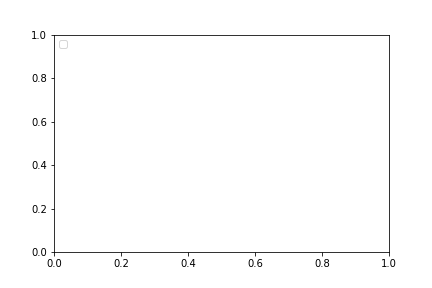

No handles with labels found to put in legend.


<IPython.core.display.Javascript object>


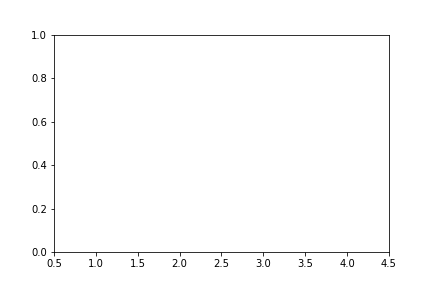

In [27]:
# JOAO - FIX - Automation WarmUp of Plot Library
import matplotlib.pyplot as plt
import time
plt.legend(loc = 'upper left')
fig= plt.figure()
ax= fig.add_subplot(111)
ax.set_xlim(0.5, 4.5)
plt.show()

In [66]:
#### Turn-off automation
#
#%matplotlib notebook
%matplotlib inline

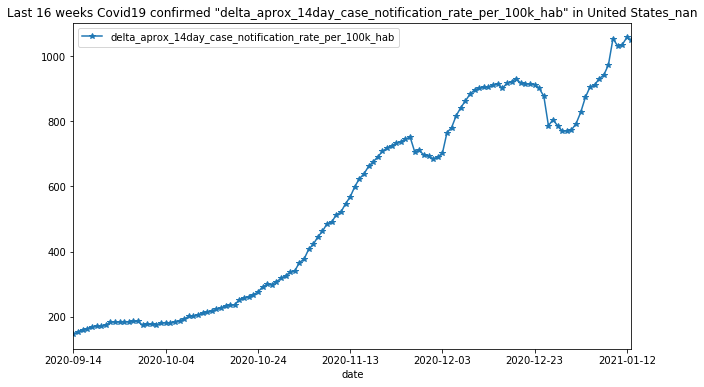

In [67]:
region='United States_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

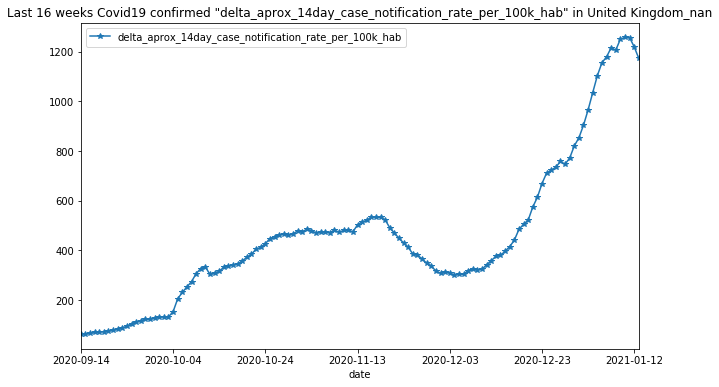

In [68]:
region='United Kingdom_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

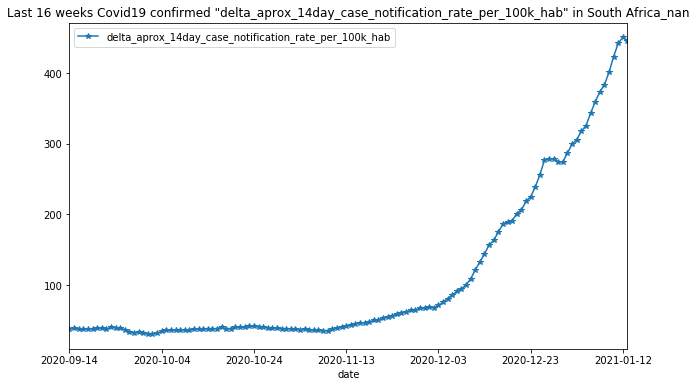

In [69]:
region='South Africa_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

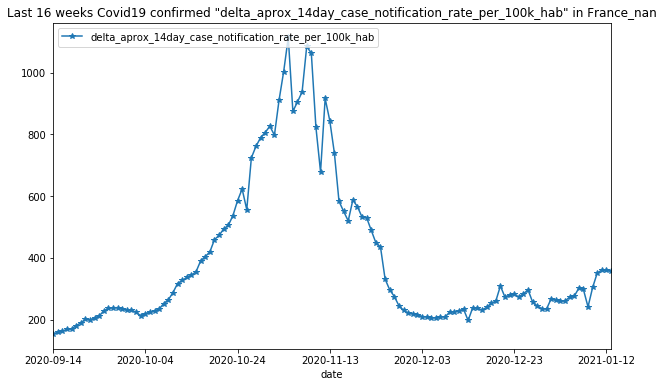

In [70]:
region='France_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

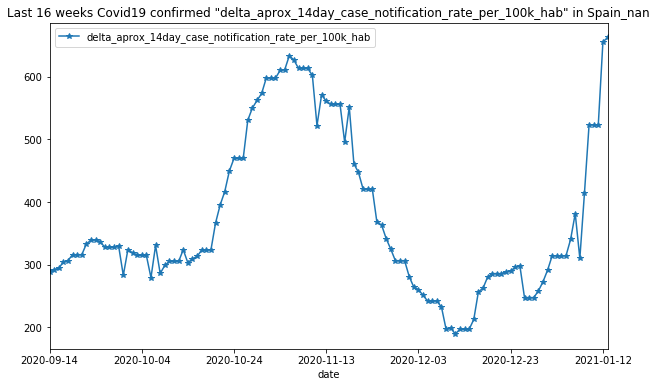

In [71]:
region='Spain_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

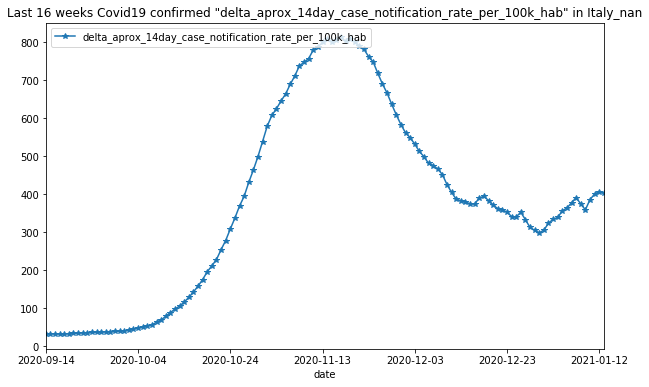

In [72]:
region='Italy_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

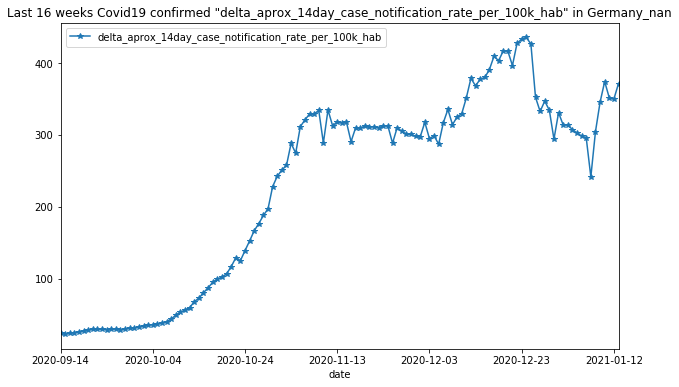

In [73]:
region='Germany_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

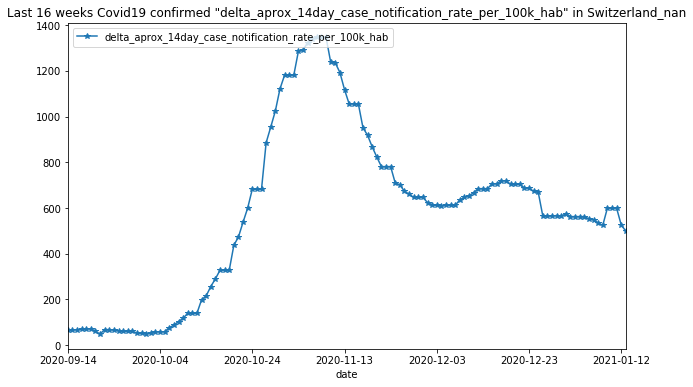

In [74]:
region='Switzerland_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

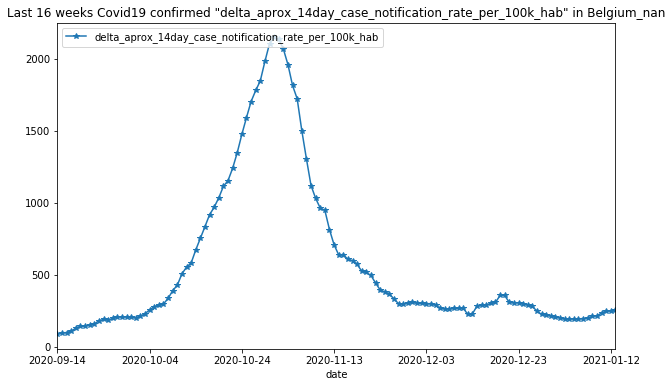

In [75]:
region='Belgium_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

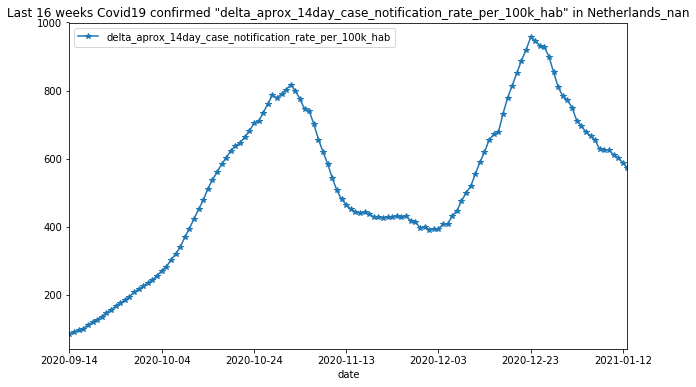

In [76]:
region='Netherlands_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

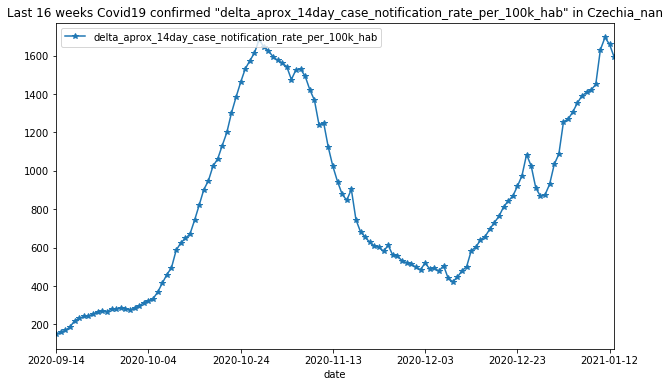

In [77]:
region='Czechia_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

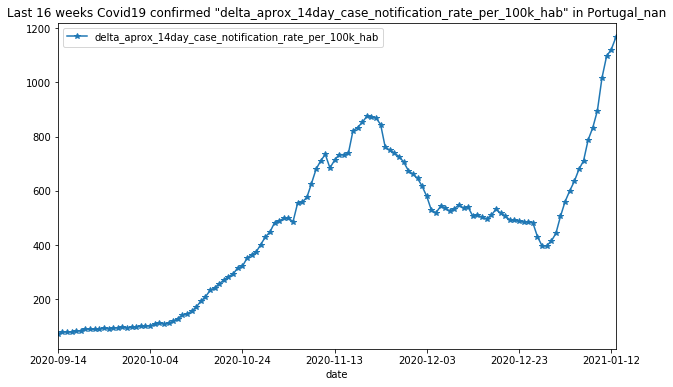

In [78]:
region='Portugal_nan'
eval_var='delta_aprox_14day_case_notification_rate_per_100k_hab'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(10,6),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [79]:
#%matplotlib notebook
%matplotlib inline

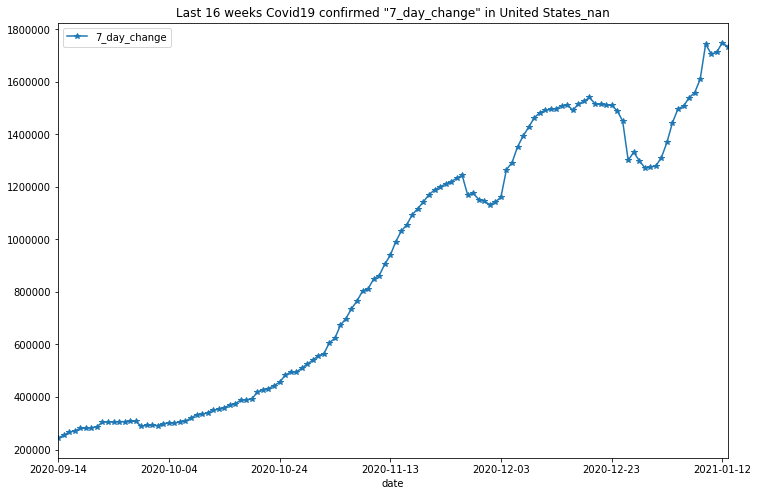

In [80]:
region='United States_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

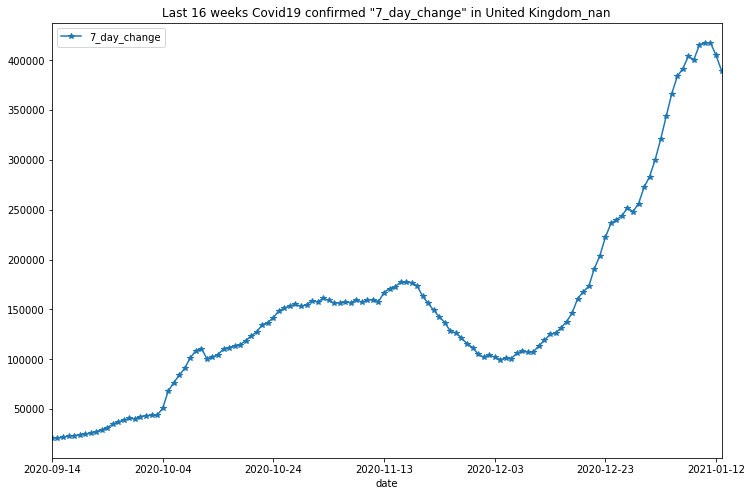

In [81]:
region='United Kingdom_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

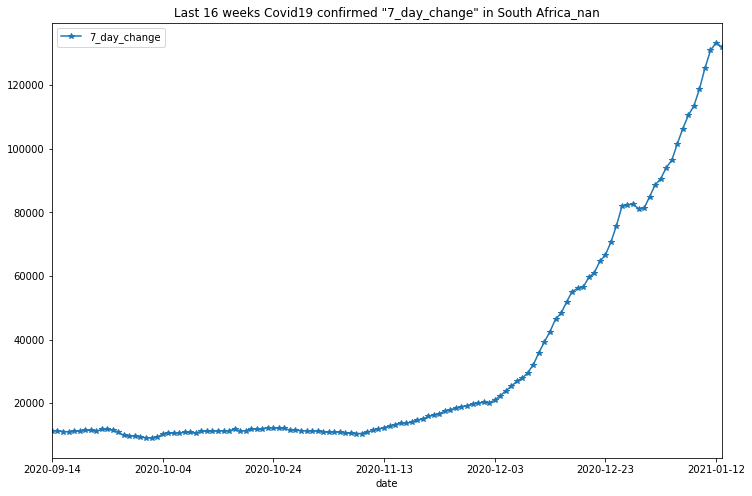

In [82]:
region='South Africa_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

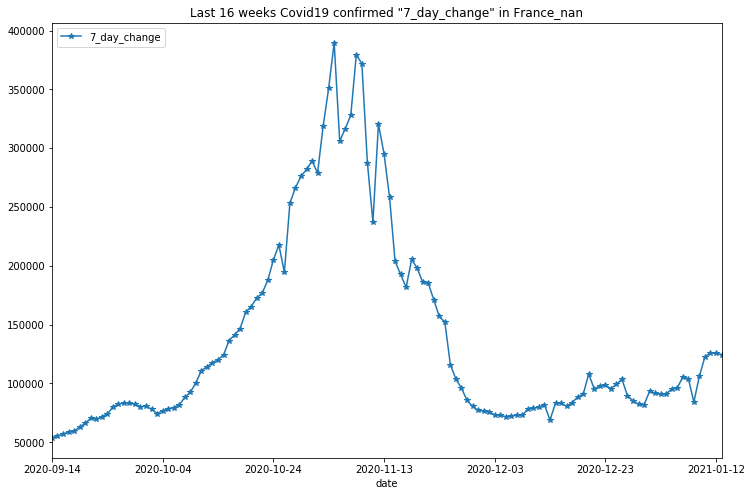

In [83]:
region='France_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

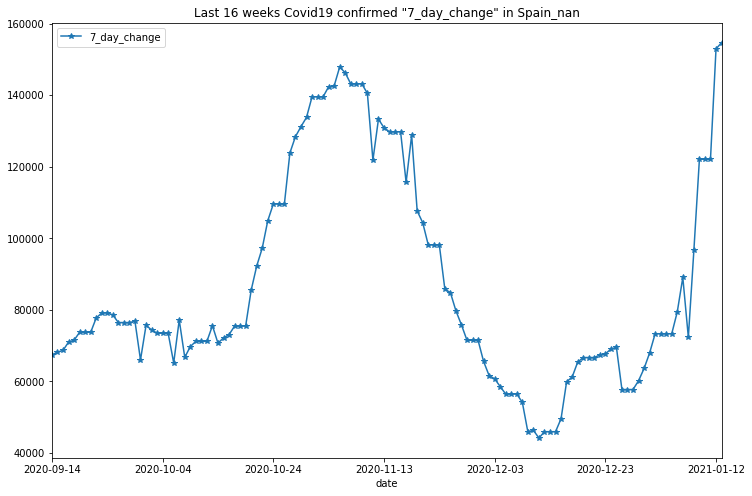

In [84]:
region='Spain_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

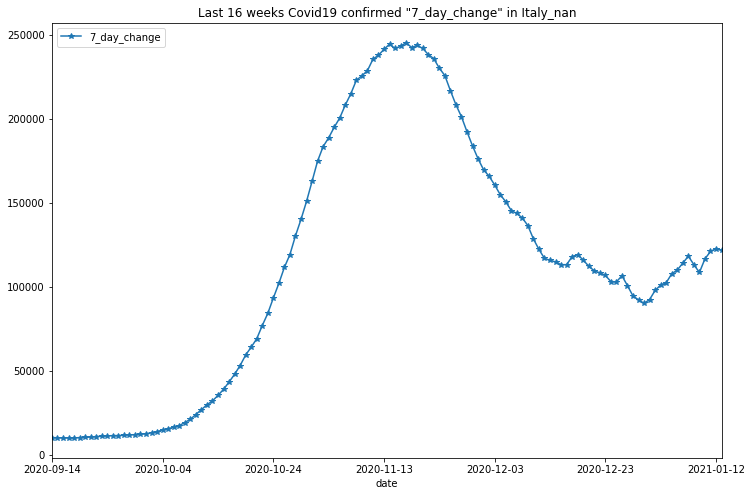

In [85]:
region='Italy_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

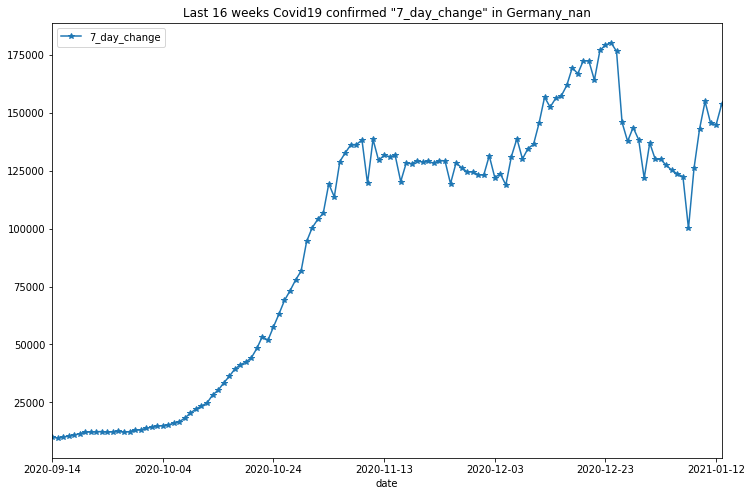

In [86]:
region='Germany_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

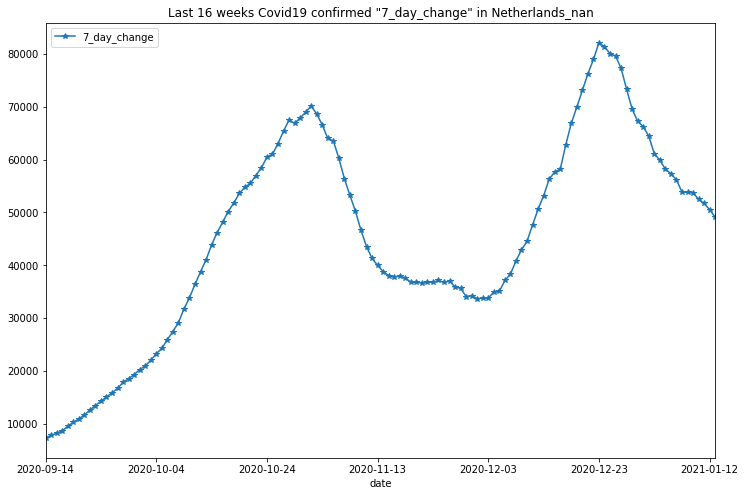

In [87]:
region='Netherlands_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

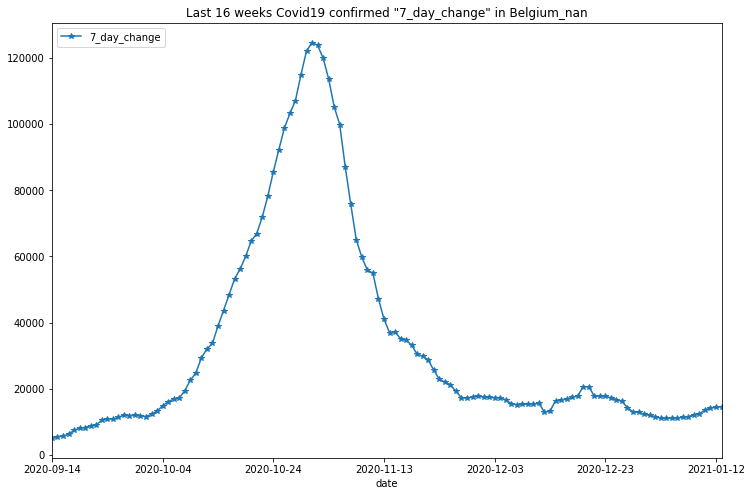

In [88]:
region='Belgium_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

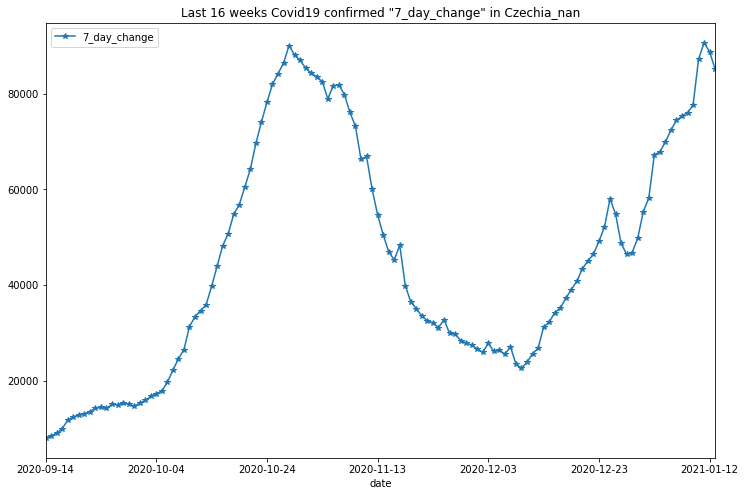

In [89]:
region='Czechia_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

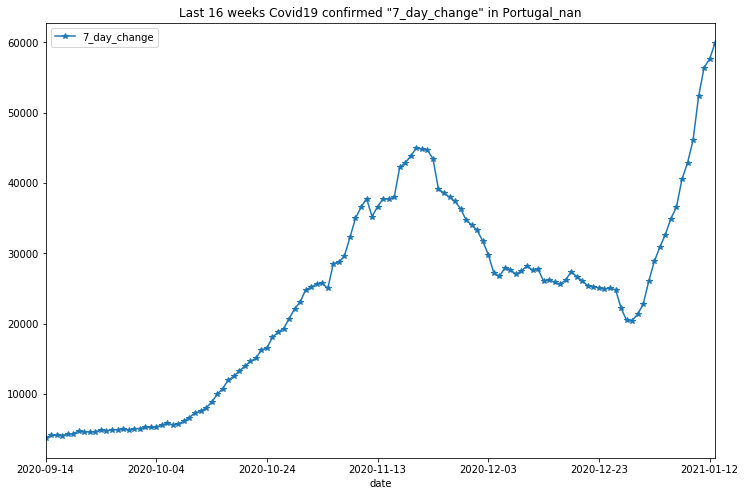

In [90]:
region='Portugal_nan'
eval_var='7_day_change'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()

In [103]:
%matplotlib notebook
#%matplotlib inline

In [104]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


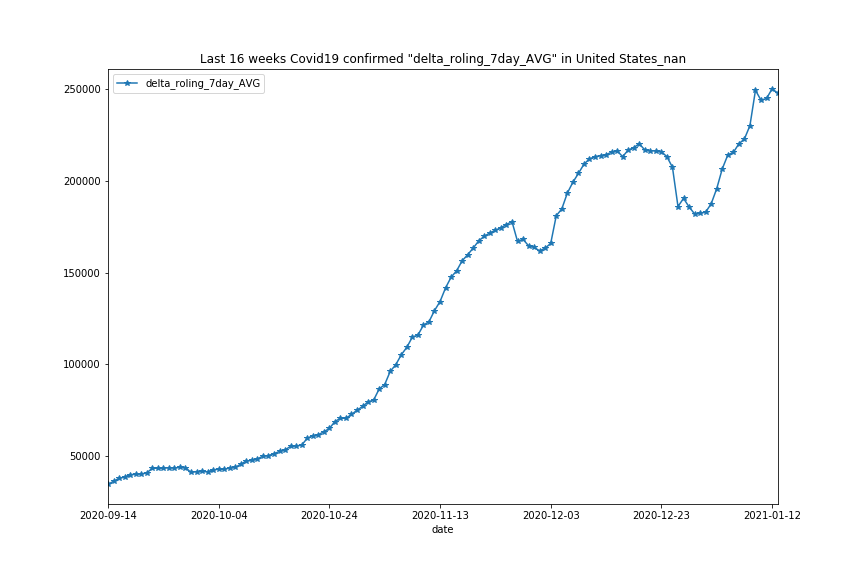

In [106]:
# Warm-Up
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [107]:
%matplotlib notebook
#%matplotlib inline

<IPython.core.display.Javascript object>


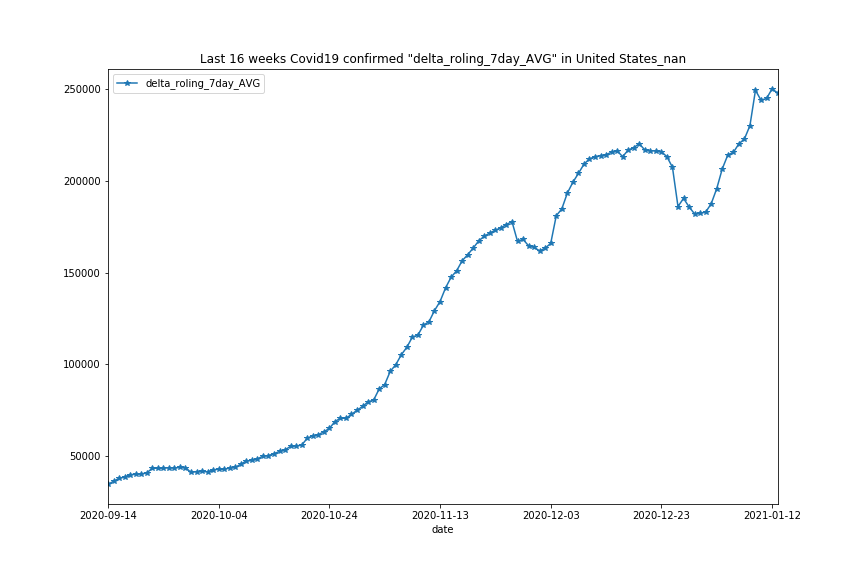

In [108]:
region='United States_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


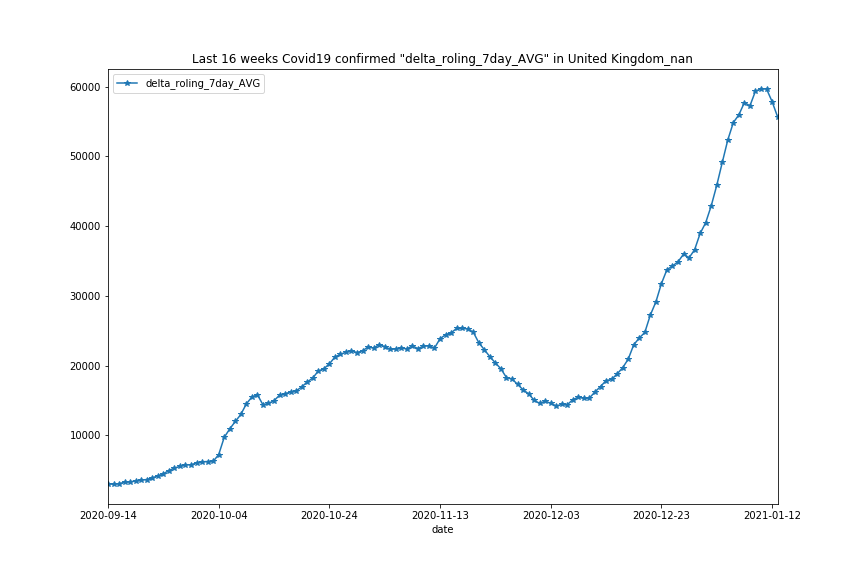

In [109]:
region='United Kingdom_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


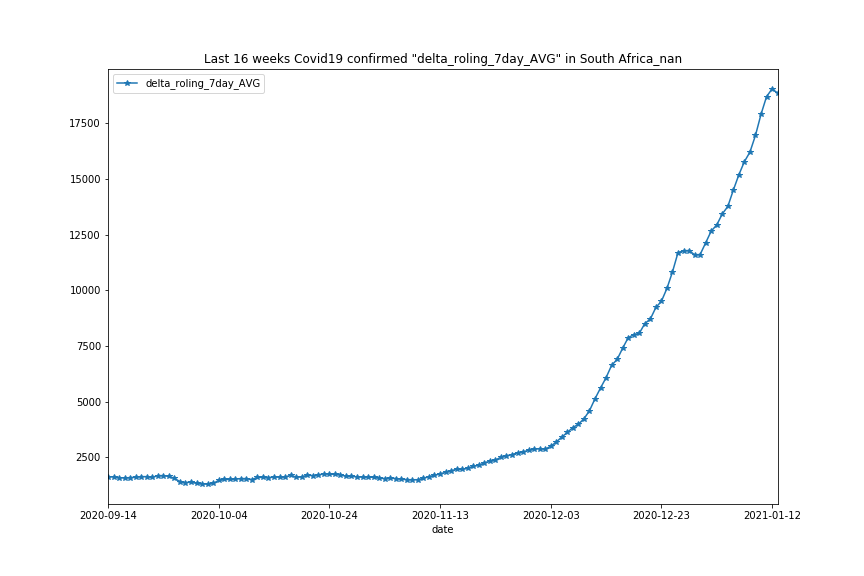

In [110]:
region='South Africa_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


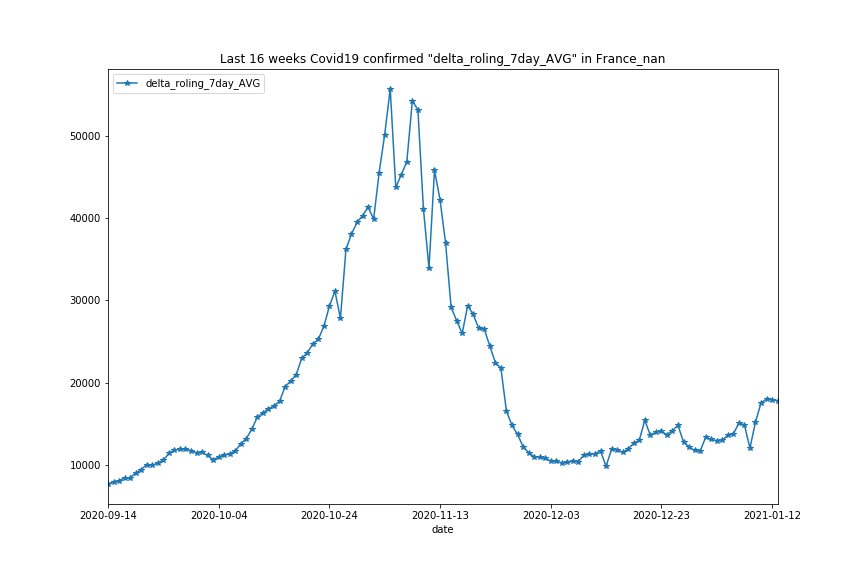

In [111]:
region='France_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


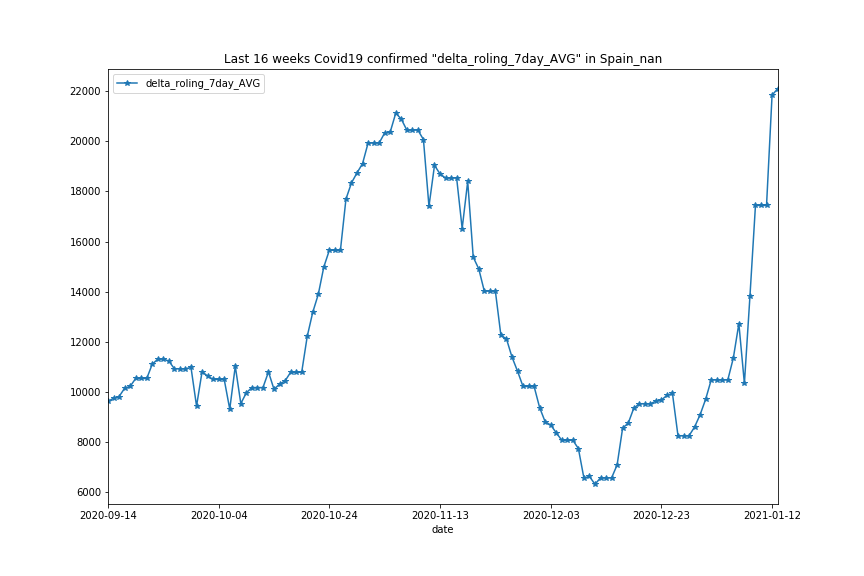

In [112]:
region='Spain_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


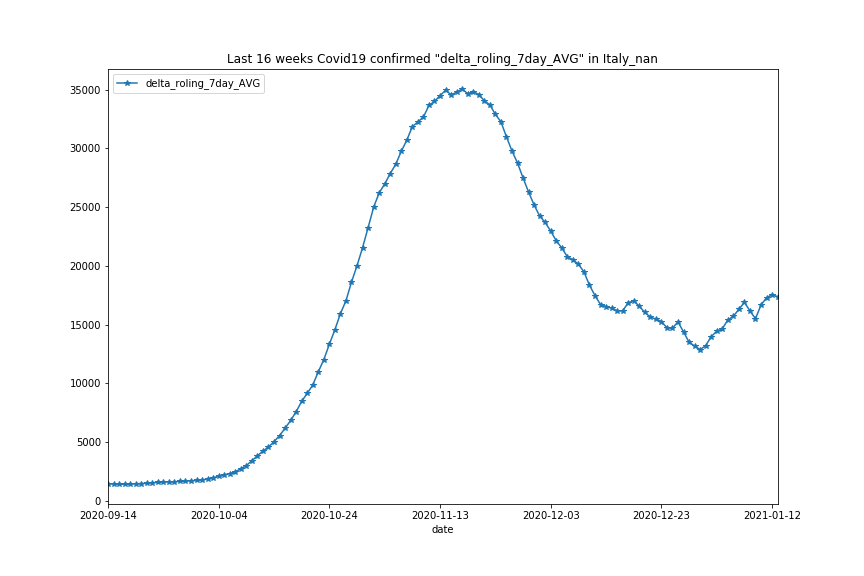

In [113]:
region='Italy_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


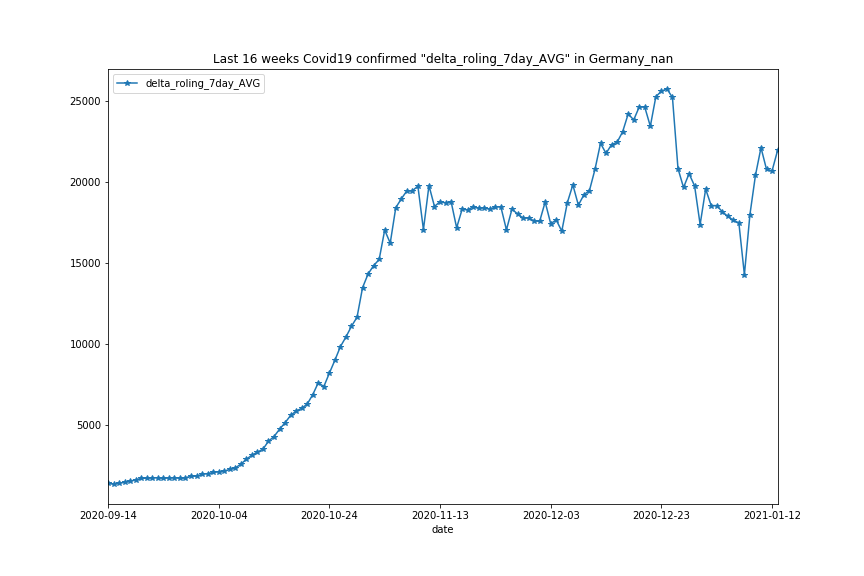

In [114]:
region='Germany_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


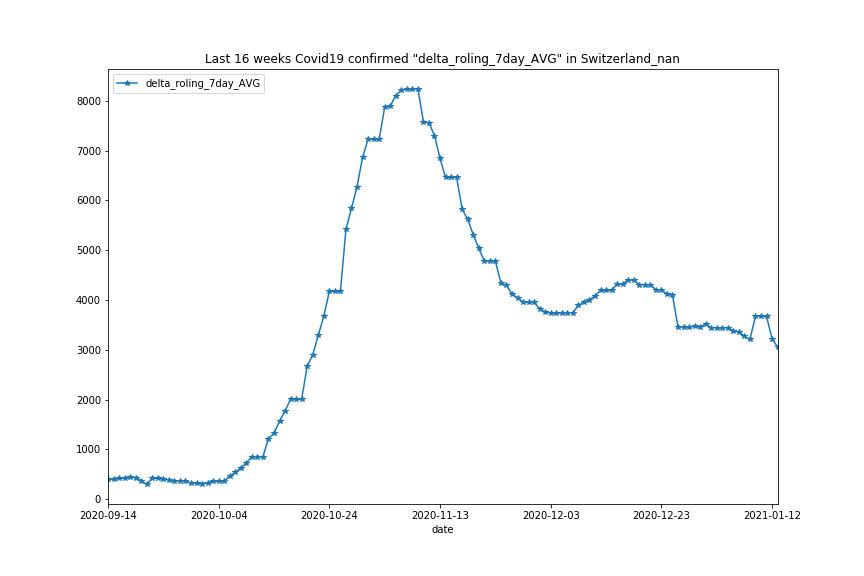

In [115]:
region='Switzerland_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


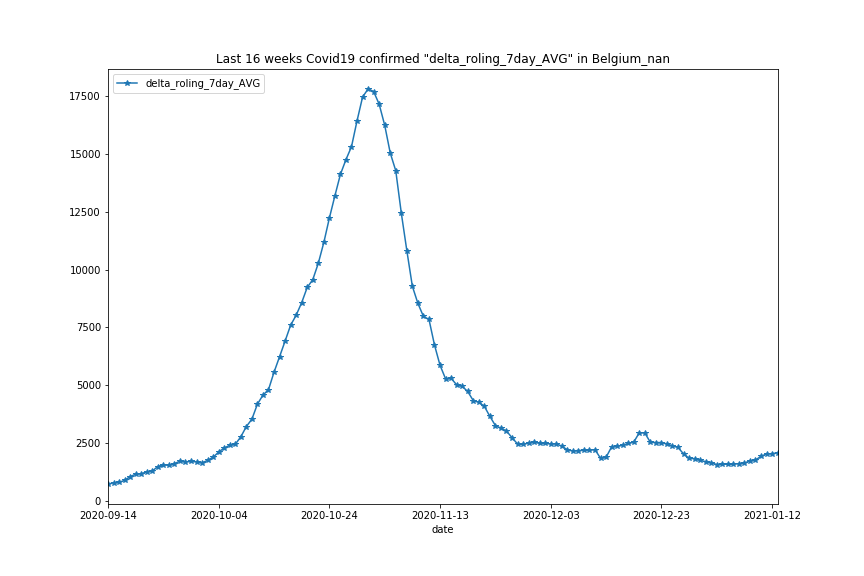

In [116]:
region='Belgium_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


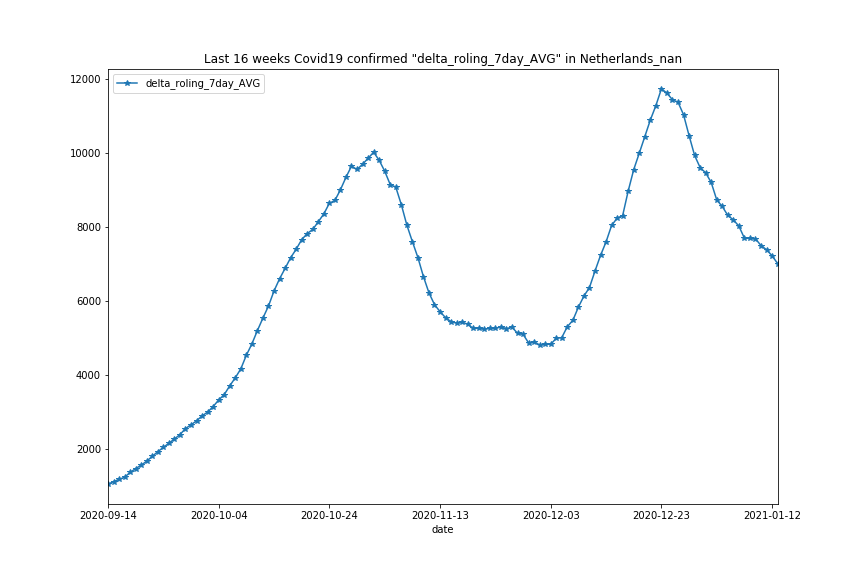

In [117]:
region='Netherlands_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


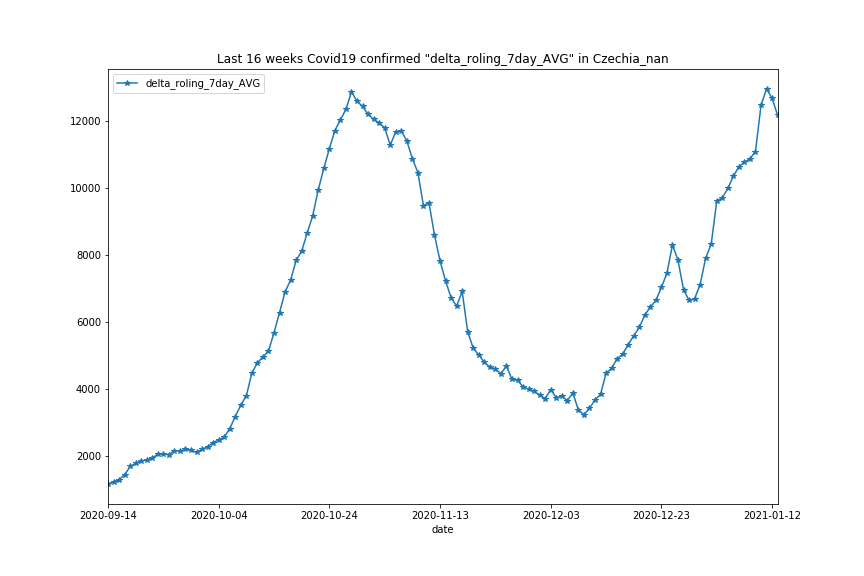

In [118]:
region='Czechia_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

<IPython.core.display.Javascript object>


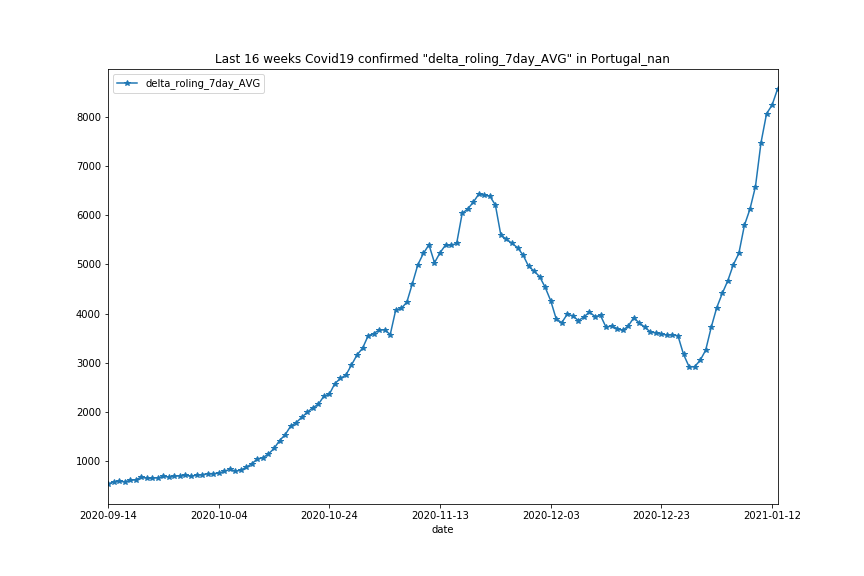

In [119]:
region='Portugal_nan'
eval_var='delta_roling_7day_AVG'
p=t[t['region']==region][['date','region',eval_var]]
#
p.iloc[len(p)-1,1]=None
p=p.set_index(['date'])
p[:].plot(marker='*',figsize=(12,8),title ='Last 16 weeks Covid19 confirmed \"'+eval_var +'\" in '+region)
plt.legend(loc = 'upper left')
plt.show()
plt.savefig("heatmaps/Daily-Covid19-Analysis-Spark-SQL-Delta.Lake_matplot.pyplot."+region+".png")

In [120]:
print("Validation Analysis "+anltdate+" : 1day-Forecast and last 16 weeks plot for https://FuelBigData.com/blog is done!")

Validation Analysis 2021-01-13 : 1day-Forecast and last 16 weeks plot for https://FuelBigData.com/blog is done!


In [121]:
exit()

ERROR:root:Invalid alias: The name clear can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name more can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name less can't be aliased because it is another magic command.
ERROR:root:Invalid alias: The name man can't be aliased because it is another magic command.
